In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import numpy as np
from atmosparams import get_params
from ionprod import ionprod, maxw, monoFlux
import matplotlib.pyplot as plt

In [22]:
dt = np.datetime64("2016-03-09T19:00")
glat = 69.35
glon = 20.36
alts_km = np.arange(60, 250, 0.5)
natmos, rho, m, H = get_params(dt, alts_km, glat, glon)

In [41]:
nE = 300 # number of energy grids
E = 1e-3*np.logspace(2, 5, nE) # E grid in keV
Q0 = 1*6.242e8 # energy flux in keV/cm^2 s. converting 15 mW/m^2 to keV/cm^2 s
E0 = 10 # in keV
# Ec, dE, I = maxw(Q0, E0, E) # I is maxwellian energy spectra with charcterstic energy E0 
I_mono = monoFlux(Q0, E0, E) # I is maxwellian energy spectra with charcterstic energy E0 
I_max = maxw(Q0, E0, E) # I is maxwellian energy spectra with charcterstic energy E0 


In [42]:
model = ionprod(rho, H,E) # ion production model
q_mono = model.getq(I_mono) # get ion production rate in 1/cm^3 s
q_max = model.getq(I_max) # get ion production rate in 1/cm^3 s


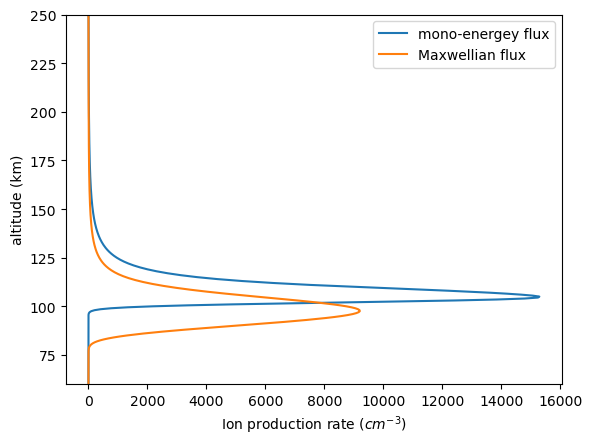

In [47]:
fig, ax = plt.subplots()
ax.plot(q_mono, alts_km, label="mono-energey flux")
ax.plot(q_max, alts_km, label="Maxwellian flux")
ax.set_ylim(60, 250)
ax.set_xlabel("Ion production rate ($cm^{-3}$)")
ax.set_ylabel("altitude (km)")
ax.legend()
plt.show()